In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from meus.printer import *
from datetime import datetime
import matplotlib.pyplot as plt

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-4-23'

In [8]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> artigo
2 -> caso-full.csv
3 -> cities.csv
4 -> covid19_municipios.csv
5 -> COVID19_REGIOES BR.csv
6 -> Dados_demográficos_municípios.xlsx
7 -> Dados_demográficos_municípios_new.xlsx
8 -> Datalab_COVID.pptx
9 -> figures
10 -> idade.xlsx
11 -> População residente municipal x população faixa etária.csv
12 -> População residente por estado - 2015.csv
13 -> População residente x sexo.csv
14 -> results


In [17]:
date = 2
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.head()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,12252023.0,False,False,1,0.00816,2020-02-25,NaN,NaN,city,SP,0,0
1,São Paulo,3550308.0,2020-02-26,12252023.0,True,False,1,0.00816,2020-02-25,NaN,NaN,city,SP,0,0
2,São Paulo,3550308.0,2020-02-27,12252023.0,False,False,1,0.00816,2020-02-27,NaN,NaN,city,SP,0,0
3,São Paulo,3550308.0,2020-02-28,12252023.0,False,False,2,0.01632,2020-02-28,NaN,NaN,city,SP,1,0
4,São Paulo,3550308.0,2020-02-29,12252023.0,False,False,2,0.01632,2020-02-29,NaN,NaN,city,SP,0,0


In [18]:
df_cov = df_cov[(df_cov['date'] == '2020-04-10') & (df_cov['place_type'] == 'city')][[
    "city",
    "estimated_population_2019",
    "last_available_confirmed",
    "last_available_deaths",
    "last_available_confirmed_per_100k_inhabitants",
    "last_available_death_rate",
]]
df_cov = df_cov.rename(columns={
    "city": "City",
    "estimated_population_2019": "Population_COVID",
    "last_available_confirmed": "Confirmed",
    "last_available_deaths": "Deaths",
    "last_available_confirmed_per_100k_inhabitants": "Confirmed/100k",
    "last_available_death_rate": "Death Rate",
})
df_cov.head()

,City,Population_COVID,Confirmed,Deaths,Confirmed/100k,Death Rate
9367,Acrelândia,15256.0,9,0.0,58.99318,NaN
9368,Bujari,10266.0,1,0.0,9.74089,NaN
9369,Plácido de Castro,19761.0,3,0.0,15.18142,NaN
9370,Porto Acre,18504.0,1,0.0,5.40424,NaN
9371,Rio Branco,407319.0,48,2.0,11.78438,0.0417


In [19]:
# df_cities = pd.DataFrame()
# group = df_cov.groupby('city')
# df_cities['Municípios'] = g_population.sum().index
# df_cities['Confirmed'] = group['last_available_confirmed'].sum()
# df_cities['Deaths'] = group.sum()['last_available_deaths']
# df_cities['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']
# df_cities.head()

In [20]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 9367 to 10250
Data columns (total 6 columns):
City                884 non-null object
Population_COVID    869 non-null float64
Confirmed           884 non-null int64
Deaths              882 non-null float64
Confirmed/100k      856 non-null float64
Death Rate          198 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 48.3+ KB


In [68]:
date = 10
df_mun =  pd.read_excel('..\\'+directory[date])
df_mun.head()

,City,0 to 4,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80+,Male,Female
0,Coronel Pilar,36,91,89,74,65,107,78,14,102,87,203,189,135,116,141,113,98,918,820
1,Santiago do Sul,84,76,89,109,120,105,77,55,83,127,117,81,81,63,36,31,31,685,680
2,Alto Alegre,107,91,94,141,97,120,129,59,134,190,128,129,121,98,69,44,81,938,894
3,Nova Castilho,124,71,75,110,72,92,66,62,119,91,79,65,51,49,42,28,20,622,594
4,Almirante Tamandaré do Sul,153,53,55,117,112,165,155,64,126,166,170,187,197,156,89,53,74,1053,1039


In [69]:
df_mun_ed = pd.DataFrame();
df_mun_ed['City'] = df_mun['City']
df_mun_ed['Children'] = df_mun['0 to 4'] + df_mun['5 to 9']
df_mun_ed['Teenager'] = df_mun['10 to 14'] + df_mun['15 to 19']
df_mun_ed['Young adults'] = df_mun['20 to 24'] + df_mun['25 to 29']
df_mun_ed['Adults'] = df_mun['30 to 34'] + df_mun['35 to 39'] + df_mun['40 to 44'] + df_mun['45 to 49'] + df_mun['50 to 54'] + df_mun['55 to 59'] + df_mun['60 to 64']
df_mun_ed['Seniors'] = df_mun['65 to 69'] + df_mun['70 to 74'] + df_mun['75 to 79'] + df_mun['80+']
df_mun_ed['Population_Age'] = df_mun_ed['Children'] + df_mun_ed['Teenager'] + df_mun_ed['Young adults'] + df_mun_ed['Adults'] + df_mun_ed['Seniors']
df_mun_ed['Male'] = df_mun['Male']
df_mun_ed['Female'] = df_mun['Female']
df_mun_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 9 columns):
City              5568 non-null object
Children          5568 non-null int64
Teenager          5568 non-null int64
Young adults      5568 non-null int64
Adults            5568 non-null int64
Seniors           5568 non-null int64
Population_Age    5568 non-null int64
Male              5568 non-null int64
Female            5568 non-null int64
dtypes: int64(8), object(1)
memory usage: 391.6+ KB


In [70]:
df = pd.merge(df_cov, df_mun_ed, on="City")
df['Population_COVID'] = df['Population_COVID'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 979
Data columns (total 14 columns):
City                980 non-null object
Population_COVID    980 non-null int64
Confirmed           980 non-null int64
Deaths              979 non-null float64
Confirmed/100k      966 non-null float64
Death Rate          213 non-null float64
Children            980 non-null int64
Teenager            980 non-null int64
Young adults        980 non-null int64
Adults              980 non-null int64
Seniors             980 non-null int64
Population_Age      980 non-null int64
Male                980 non-null int64
Female              980 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 114.8+ KB


In [73]:
df.sum()

City                AcrelândiaBujariPlácido de CastroPorto AcreRio...
Population_COVID                                            151447193
Confirmed                                                       18942
Deaths                                                            998
Confirmed/100k                                                8950.39
Death Rate                                                    70.9055
Children                                                     19494228
Teenager                                                     21980086
Young adults                                                 23043627
Adults                                                       61619757
Seniors                                                      10597615
Population_Age                                              136735313
Male                                                         66672446
Female                                                       70062867
dtype: object

In [62]:
g = 1
print_campo = 'n'
col1 = 'Confirmed/100k'
col2 = 'Male'
try:
    os.mkdir(col2)
    print('Directory created')
except FileExistsError:
    print('Directory already exists')    

Directory already exists


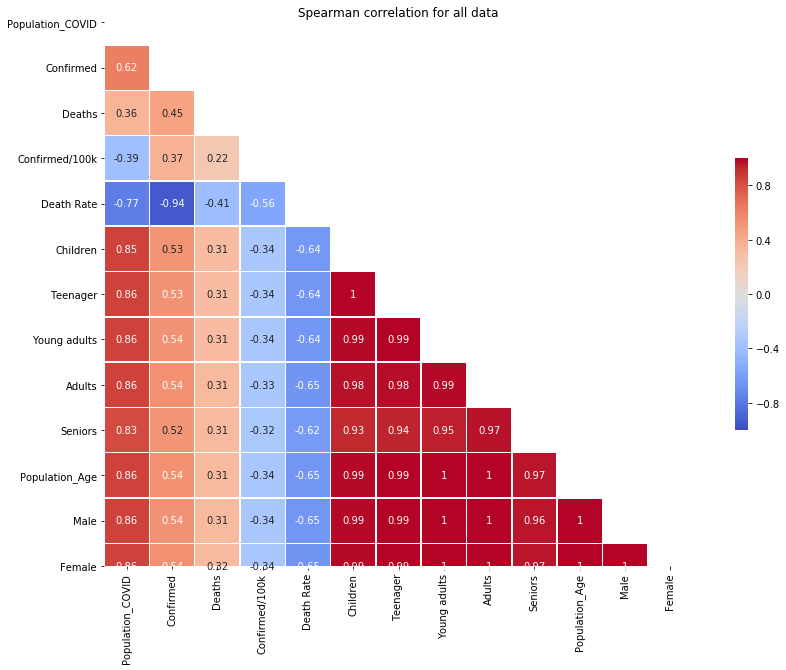

In [63]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    mask=mask
)
plt.title('Spearman correlation for all data')
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

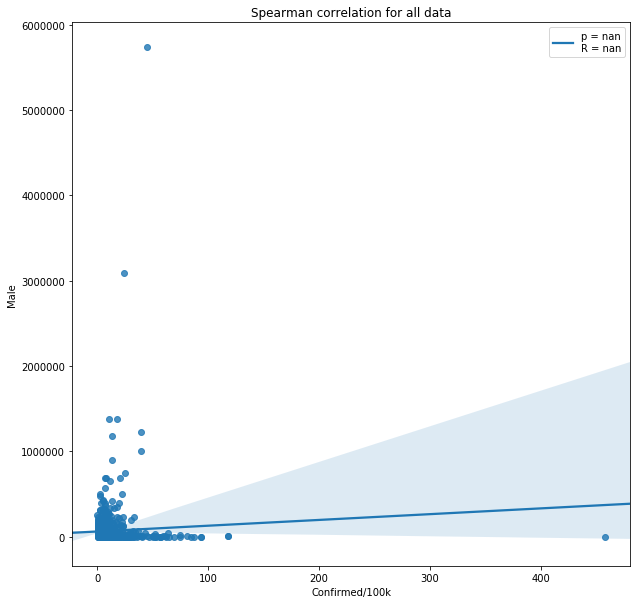

In [28]:
df_mold = df
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

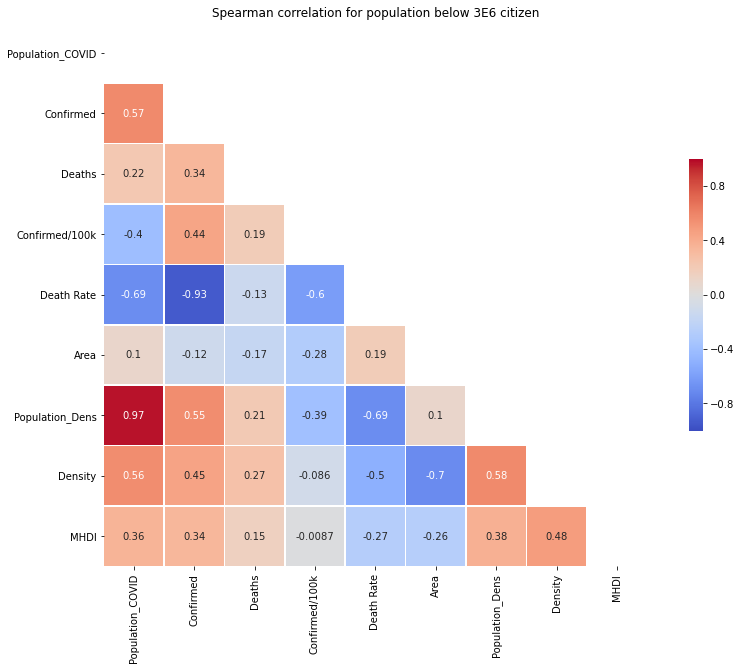

In [14]:
corr = df[df['Population_Dens'] < 300000].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    mask=mask
)
plt.title('Spearman correlation for population below 3E6 citizen')
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

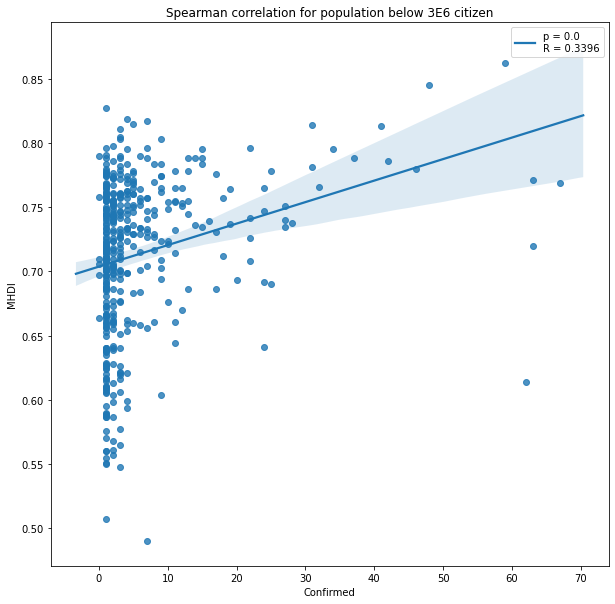

In [15]:
df_mold = df[df['Population_Dens'] < 300000]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for population below 3E6 citizen')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

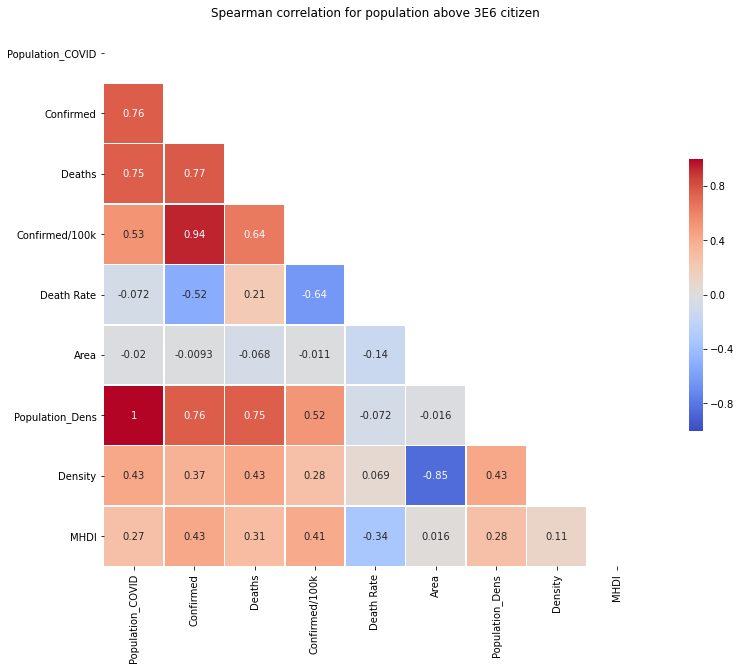

In [16]:
corr = df[df['Population_Dens'] > 300000].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    mask=mask
)
plt.title('Spearman correlation for population above 3E6 citizen')
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

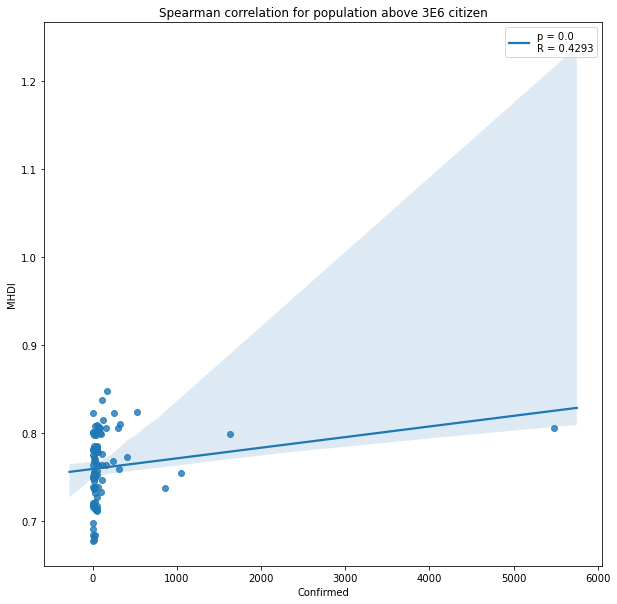

In [17]:
df_mold = df[df['Population_Dens'] > 300000]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for population above 3E6 citizen')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

In [18]:
g = 1
col1 = 'Confirmed'
col2 = 'Density'
try:
    os.mkdir(col2)
    print('Directory created')
except FileExistsError:
    print('Directory already exists')    

Directory created


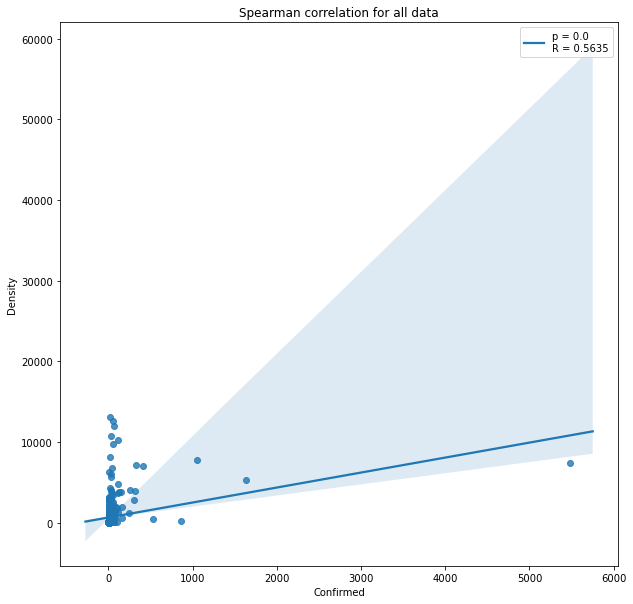

In [19]:
df_mold = df
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

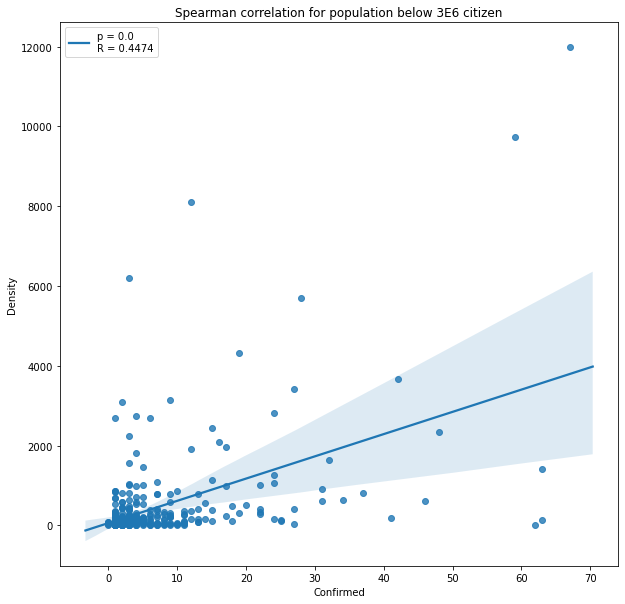

In [20]:
df_mold = df[df['Population_Dens'] < 300000]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for population below 3E6 citizen')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

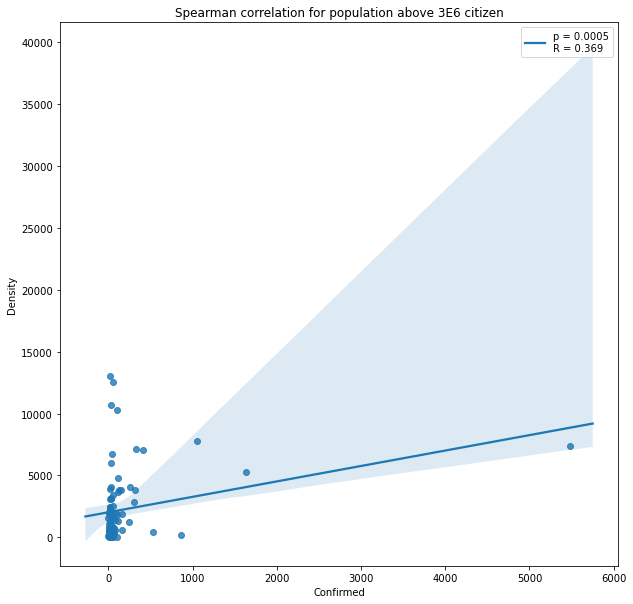

In [21]:
df_mold = df[df['Population_Dens'] > 300000]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for population above 3E6 citizen')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    g += 1
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)